In [1]:
!pip install open3d

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.7/447.7 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


Генерация облака точек в форме сферы...
Создание исходного скалярного поля...
Создано облако из 2000 точек.
Диапазон исходного скалярного поля: от -9.97 до 9.94

Исходное облако точек и скалярное поле


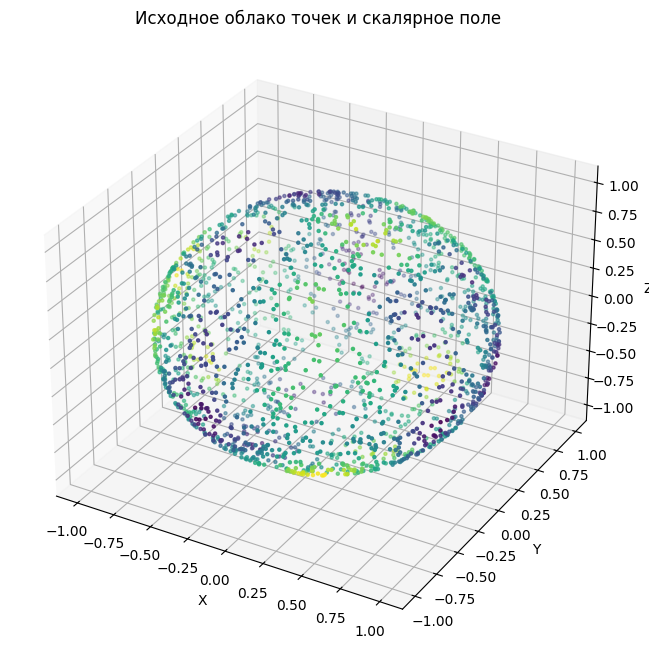


--- Задание 1: Добавить скалярное поле с постоянным значением ---
Создано поле с постоянным значением: 10.0

--- Задание 2: Умножить скалярное поле на число ---
Диапазон поля после умножения на 2: от -19.93 до 19.89

--- Задание 3: Добавить число к значениям скалярного поля ---
Диапазон поля после добавления 5: от -4.97 до 14.94

--- Задание 4: Применить гауссов фильтр ---


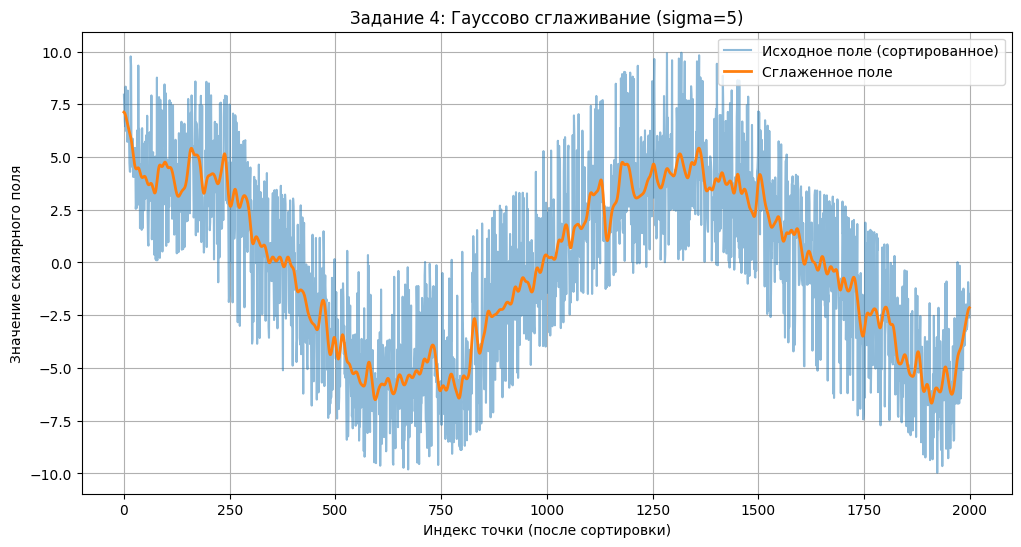


Гауссово сглаживание


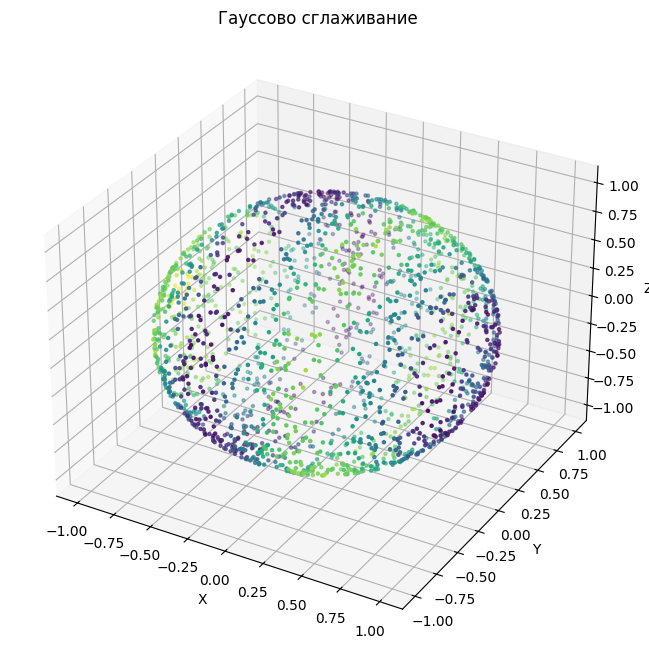


--- Задание 5: Вычислить градиент скалярного поля ---
Градиент вычислен. Диапазон значений градиента: от -4.78 до 4.74


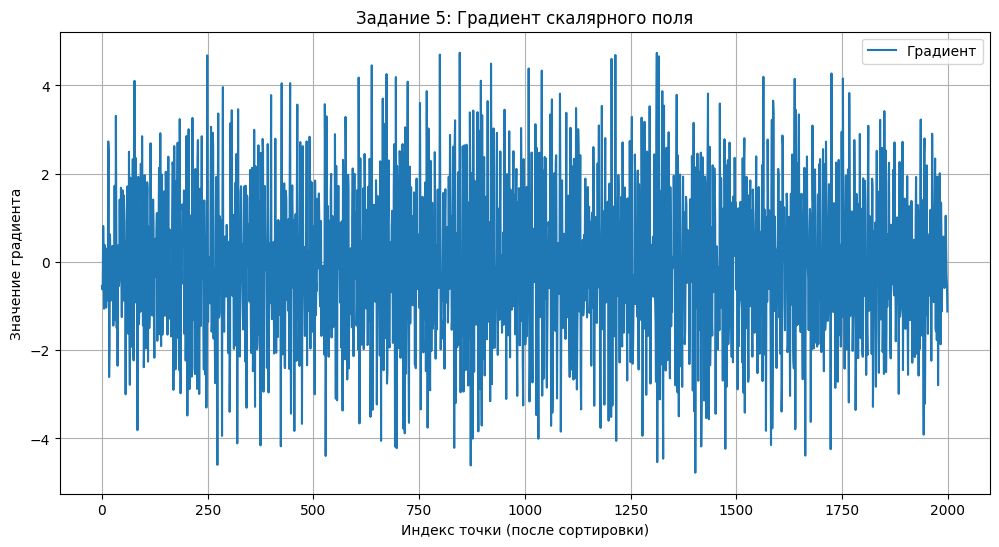


--- Задание 6: Сглаживание скользящим средним ---


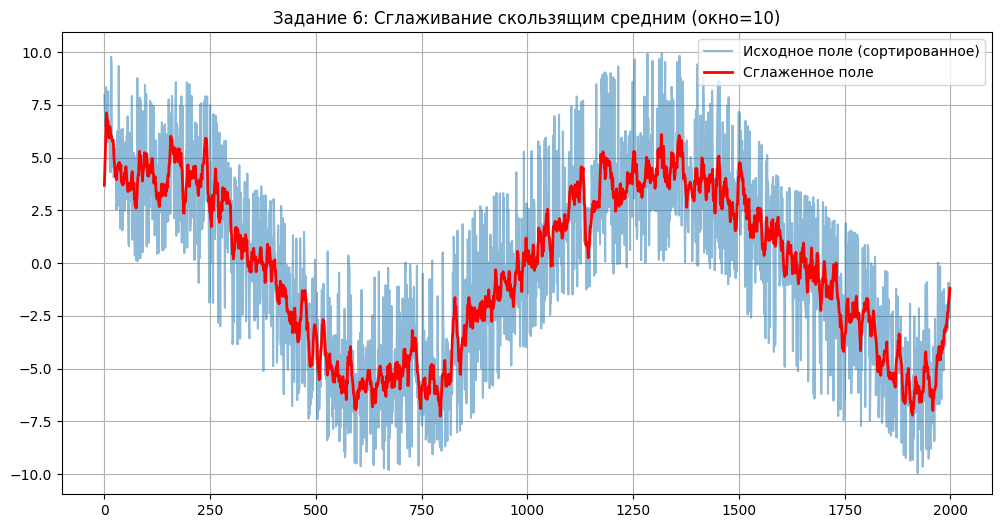


--- Задание 7: Преобразование в RGB цвета ---
Создан массив цветов размером (2000, 3). Пример первого цвета: [0.14021  0.665859 0.513427]

--- Задание 8: Статистические параметры ---
------------------------------------
| Параметр      | Значение         |
------------------------------------
| Среднее       | -0.1873          |
| Ст. отклонение| 4.4456           |
| Минимальное   | -9.9668          |
| Максимальное  | 9.9447           |
------------------------------------

--- Задание 9: Нормализация в диапазон [0, 1] ---
Диапазон нормализованного поля: от 0.00 до 1.00

--- Задание 10: Интерполяция пропусков ---


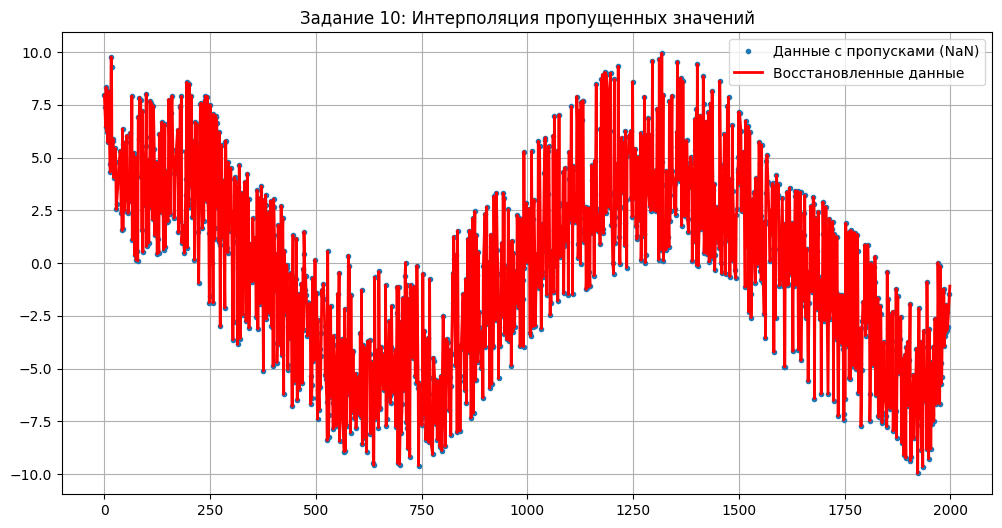


--- Задание 11: Фильтрация по значению ---
Исходное количество точек: 2000
Количество точек после фильтрации: 758

Отфильтрованные точки (значения от 0 до 5)


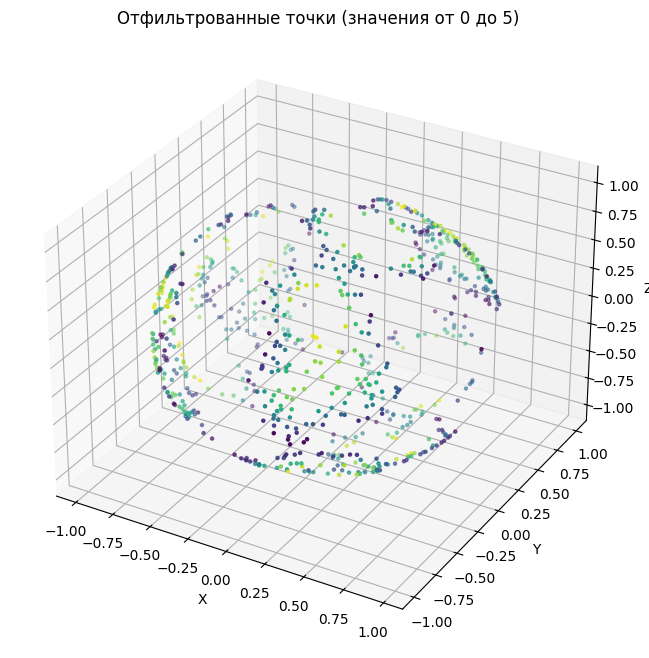


--- Задание 12: Использование скалярного поля как Z-координаты ---
Координата Z была заменена значениями скалярного поля.

Z-координата заменена скалярным полем


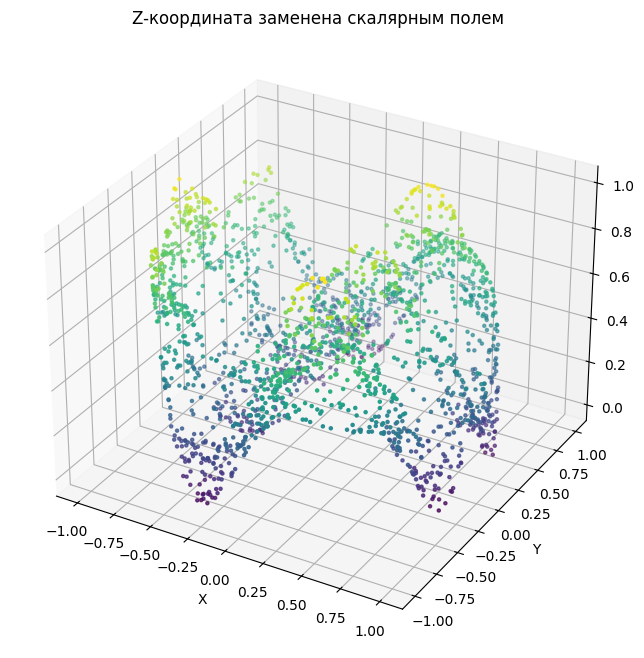


--- Задание 13: Удаление скалярного поля ---
Скалярное поле удалено.
Ошибка при доступе к полю: name 'scalar_field_to_delete' is not defined. Удаление прошло успешно.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d


print("Генерация облака точек в форме сферы...")
n_points = 2000
phi = np.random.uniform(0, 2 * np.pi, n_points)
costheta = np.random.uniform(-1, 1, n_points)
theta = np.arccos(costheta)
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)
xyz = np.vstack((x, y, z)).T

print("Создание исходного скалярного поля...")
initial_scalar_field = 5 * np.sin(5 * xyz[:, 0]) + 3 * np.cos(10 * xyz[:, 1]) + 2 * np.sin(7 * xyz[:, 2])
scalar_field = np.copy(initial_scalar_field)

print(f"Создано облако из {xyz.shape[0]} точек.")
print(f"Диапазон исходного скалярного поля: от {scalar_field.min():.2f} до {scalar_field.max():.2f}")

def visualize_point_cloud(xyz_coords, scalar_data, title="Визуализация облака точек"):
    print(f"\n{title}")

    normed_scalar = (scalar_data - scalar_data.min()) / (scalar_data.max() - scalar_data.min())
    colors = plt.cm.viridis(normed_scalar)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=colors, s=5)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

visualize_point_cloud(xyz, scalar_field, "Исходное облако точек и скалярное поле")


print("\n--- Задание 1: Добавить скалярное поле с постоянным значением ---")
scalar_field_const = np.full(xyz.shape[0], 10.0)
print(f"Создано поле с постоянным значением: {scalar_field_const[0]}")

print("\n--- Задание 2: Умножить скалярное поле на число ---")
scalar_field_mult = scalar_field * 2
print(f"Диапазон поля после умножения на 2: от {scalar_field_mult.min():.2f} до {scalar_field_mult.max():.2f}")

print("\n--- Задание 3: Добавить число к значениям скалярного поля ---")
scalar_field_add = scalar_field + 5
print(f"Диапазон поля после добавления 5: от {scalar_field_add.min():.2f} до {scalar_field_add.max():.2f}")

print("\n--- Задание 4: Применить гауссов фильтр ---")
sort_indices = np.argsort(xyz[:, 0])
scalar_sorted = scalar_field[sort_indices]
smoothed_scalar_gauss = gaussian_filter1d(scalar_sorted, sigma=5)

plt.figure(figsize=(12, 6))
plt.title("Задание 4: Гауссово сглаживание (sigma=5)")
plt.plot(scalar_sorted, label="Исходное поле (сортированное)", alpha=0.5)
plt.plot(smoothed_scalar_gauss, label="Сглаженное поле", linewidth=2)
plt.legend()
plt.xlabel("Индекс точки (после сортировки)")
plt.ylabel("Значение скалярного поля")
plt.grid(True)
plt.show()

visualize_point_cloud(xyz[sort_indices], smoothed_scalar_gauss, "Гауссово сглаживание")

print("\n--- Задание 5: Вычислить градиент скалярного поля ---")
gradient = np.gradient(scalar_sorted)
print(f"Градиент вычислен. Диапазон значений градиента: от {gradient.min():.2f} до {gradient.max():.2f}")

plt.figure(figsize=(12, 6))
plt.title("Задание 5: Градиент скалярного поля")
plt.plot(gradient, label="Градиент")
plt.legend()
plt.xlabel("Индекс точки (после сортировки)")
plt.ylabel("Значение градиента")
plt.grid(True)
plt.show()

print("\n--- Задание 6: Сглаживание скользящим средним ---")
def moving_average(data, window_size=10):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

smoothed_ma = moving_average(scalar_sorted, window_size=10)

plt.figure(figsize=(12, 6))
plt.title("Задание 6: Сглаживание скользящим средним (окно=10)")
plt.plot(scalar_sorted, label="Исходное поле (сортированное)", alpha=0.5)
plt.plot(smoothed_ma, label="Сглаженное поле", linewidth=2, color='red')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Задание 7: Преобразование в RGB цвета ---")
normed_colors = (scalar_field - scalar_field.min()) / (scalar_field.max() - scalar_field.min())
colors = plt.cm.viridis(normed_colors)[:, :3]
print(f"Создан массив цветов размером {colors.shape}. Пример первого цвета: {colors[0]}")

print("\n--- Задание 8: Статистические параметры ---")
mean_val = scalar_field.mean()
std_val = scalar_field.std()
min_val = scalar_field.min()
max_val = scalar_field.max()

print("------------------------------------")
print("| Параметр      | Значение         |")
print("------------------------------------")
print(f"| Среднее       | {mean_val:<16.4f} |")
print(f"| Ст. отклонение| {std_val:<16.4f} |")
print(f"| Минимальное   | {min_val:<16.4f} |")
print(f"| Максимальное  | {max_val:<16.4f} |")
print("------------------------------------")

print("\n--- Задание 9: Нормализация в диапазон [0, 1] ---")
normed_scalar = (scalar_field - min_val) / (max_val - min_val)
print(f"Диапазон нормализованного поля: от {normed_scalar.min():.2f} до {normed_scalar.max():.2f}")

print("\n--- Задание 10: Интерполяция пропусков ---")
scalar_with_nan = np.copy(scalar_sorted)
nan_indices = np.random.choice(len(scalar_with_nan), size=500, replace=False)
scalar_with_nan[nan_indices] = np.nan

def interpolate_nan(data):
    nans = np.isnan(data)
    x = np.arange(len(data))
    interp_func = interp1d(x[~nans], data[~nans], bounds_error=False, fill_value="extrapolate", kind='linear')
    return interp_func(x)

filled_scalar = interpolate_nan(scalar_with_nan)

plt.figure(figsize=(12, 6))
plt.title("Задание 10: Интерполяция пропущенных значений")
plt.plot(scalar_with_nan, 'o', label="Данные с пропусками (NaN)", markersize=3)
plt.plot(filled_scalar, label="Восстановленные данные", color='red', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Задание 11: Фильтрация по значению ---")
mask = (scalar_field >= 0) & (scalar_field <= 5)
filtered_points = xyz[mask]
filtered_scalar = scalar_field[mask]
print(f"Исходное количество точек: {xyz.shape[0]}")
print(f"Количество точек после фильтрации: {filtered_points.shape[0]}")

visualize_point_cloud(filtered_points, filtered_scalar, "Отфильтрованные точки (значения от 0 до 5)")

print("\n--- Задание 12: Использование скалярного поля как Z-координаты ---")
xyz_modified = np.copy(xyz)
xyz_modified[:, 2] = normed_scalar
print("Координата Z была заменена значениями скалярного поля.")

visualize_point_cloud(xyz_modified, scalar_field, "Z-координата заменена скалярным полем")

print("\n--- Задание 13: Удаление скалярного поля ---")
scalar_field_to_delete = np.copy(scalar_field)
del scalar_field_to_delete
print("Скалярное поле удалено.")

try:
    print(scalar_field_to_delete)
except NameError as e:
    print(f"Ошибка при доступе к полю: {e}. Удаление прошло успешно.")